In [71]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 1.What are the key statistical measures for each ETF and individual stock, such as mean, median, standard deviation, and skewness, over the 5-year period? 
(6 Marks)

In [72]:
# Stats for EQUITY
equity_folder = 'EQUITY/'
equity_stats = []
equity_files = os.listdir(equity_folder)
for file in equity_files:
    if file.endswith('.csv'):
        equity_df = pd.read_csv(os.path.join(equity_folder, file))
        close_prices = equity_df['Close']
        equity_stat = {
            'Equity': file.replace('.csv', ''),
            'Mean': close_prices.mean(),
            'Median': close_prices.median(),
            'Standard Deviation': close_prices.std(),
            'Skewness': close_prices.skew()
        }
        equity_stats.append(equity_stat)
# Display results
print("Summary Statistics for Equities:")
print(pd.DataFrame(equity_stats))


Summary Statistics for Equities:
   Equity        Mean      Median  Standard Deviation  Skewness
0       V  178.373593  185.919907           37.424426 -0.327646
1    OPEN   14.724128   14.797500            7.480094  0.324175
2     GPN  146.856194  143.693893           32.410151  0.241310
3    UPST  116.717468  106.005001           86.492984  1.222477
4    LMND   61.651375   61.135000           36.406889  0.778762
5    COIN  186.912902  221.139999           90.414355 -0.183545
6    INTU  324.081602  281.594421          129.805943  0.727366
7    MELI  843.828999  666.460022          483.144635  0.622659
8    AFRM   66.356763   62.910000           39.361505  0.690505
9    PYPL  140.018054  107.540001           68.700727  0.951763
10   GDOT   48.337085   48.480000           18.607846  0.273899
11   HOOD   19.940417   12.400000           14.026528  1.111257
12    FIS  115.049965  112.796593           19.433307  0.110886
13     GS  251.782104  219.473892           72.721979  0.644611
14   SO

In [73]:
# Stats for ETFs
etf_folder = 'ETFs/'
etf_stats = []
etf_files = os.listdir(etf_folder)
for file in etf_files:
    if file.endswith('.csv'):
        etf_df = pd.read_csv(os.path.join(etf_folder, file))
        close_prices = etf_df['Close']
        
        etf_stat = {
            'ETF': file.replace('.csv', ''),
            'Mean': close_prices.mean(),
            'Median': close_prices.median(),
            'Standard Deviation': close_prices.std(),
            'Skewness': close_prices.skew()
        }
        etf_stats.append(etf_stat)
        
print("\nSummary Statistics for ETFs:")
print(pd.DataFrame(etf_stats))


Summary Statistics for ETFs:
    ETF        Mean      Median  Standard Deviation  Skewness
0  TPAY   35.001634   33.015749            7.151443  0.423456
1  ARKF   32.947462   26.979259           13.532497  0.468069
2  EMFQ   34.528060   28.551001           11.569409  0.582082
3  KOIN   31.179338   29.365662            7.194192  0.371685
4  FINX   30.709403   27.490252            8.510884  0.763048
5  BLOK   23.855178   17.394224           11.373659  1.087033
6   IYG  141.289292  128.744476           27.128120  0.635255
7  BITQ   16.764564   17.670000            7.535658 -0.025411
8  IPAY   49.243082   46.825901           11.397225  0.650978
9  FNTC   16.609984   15.402000            4.471350  0.523541


### 2. Can you identify any noticeable trends or patterns in the historical data of ETFs and individual stocks? 
(4 Marks)

#### Equity Plots

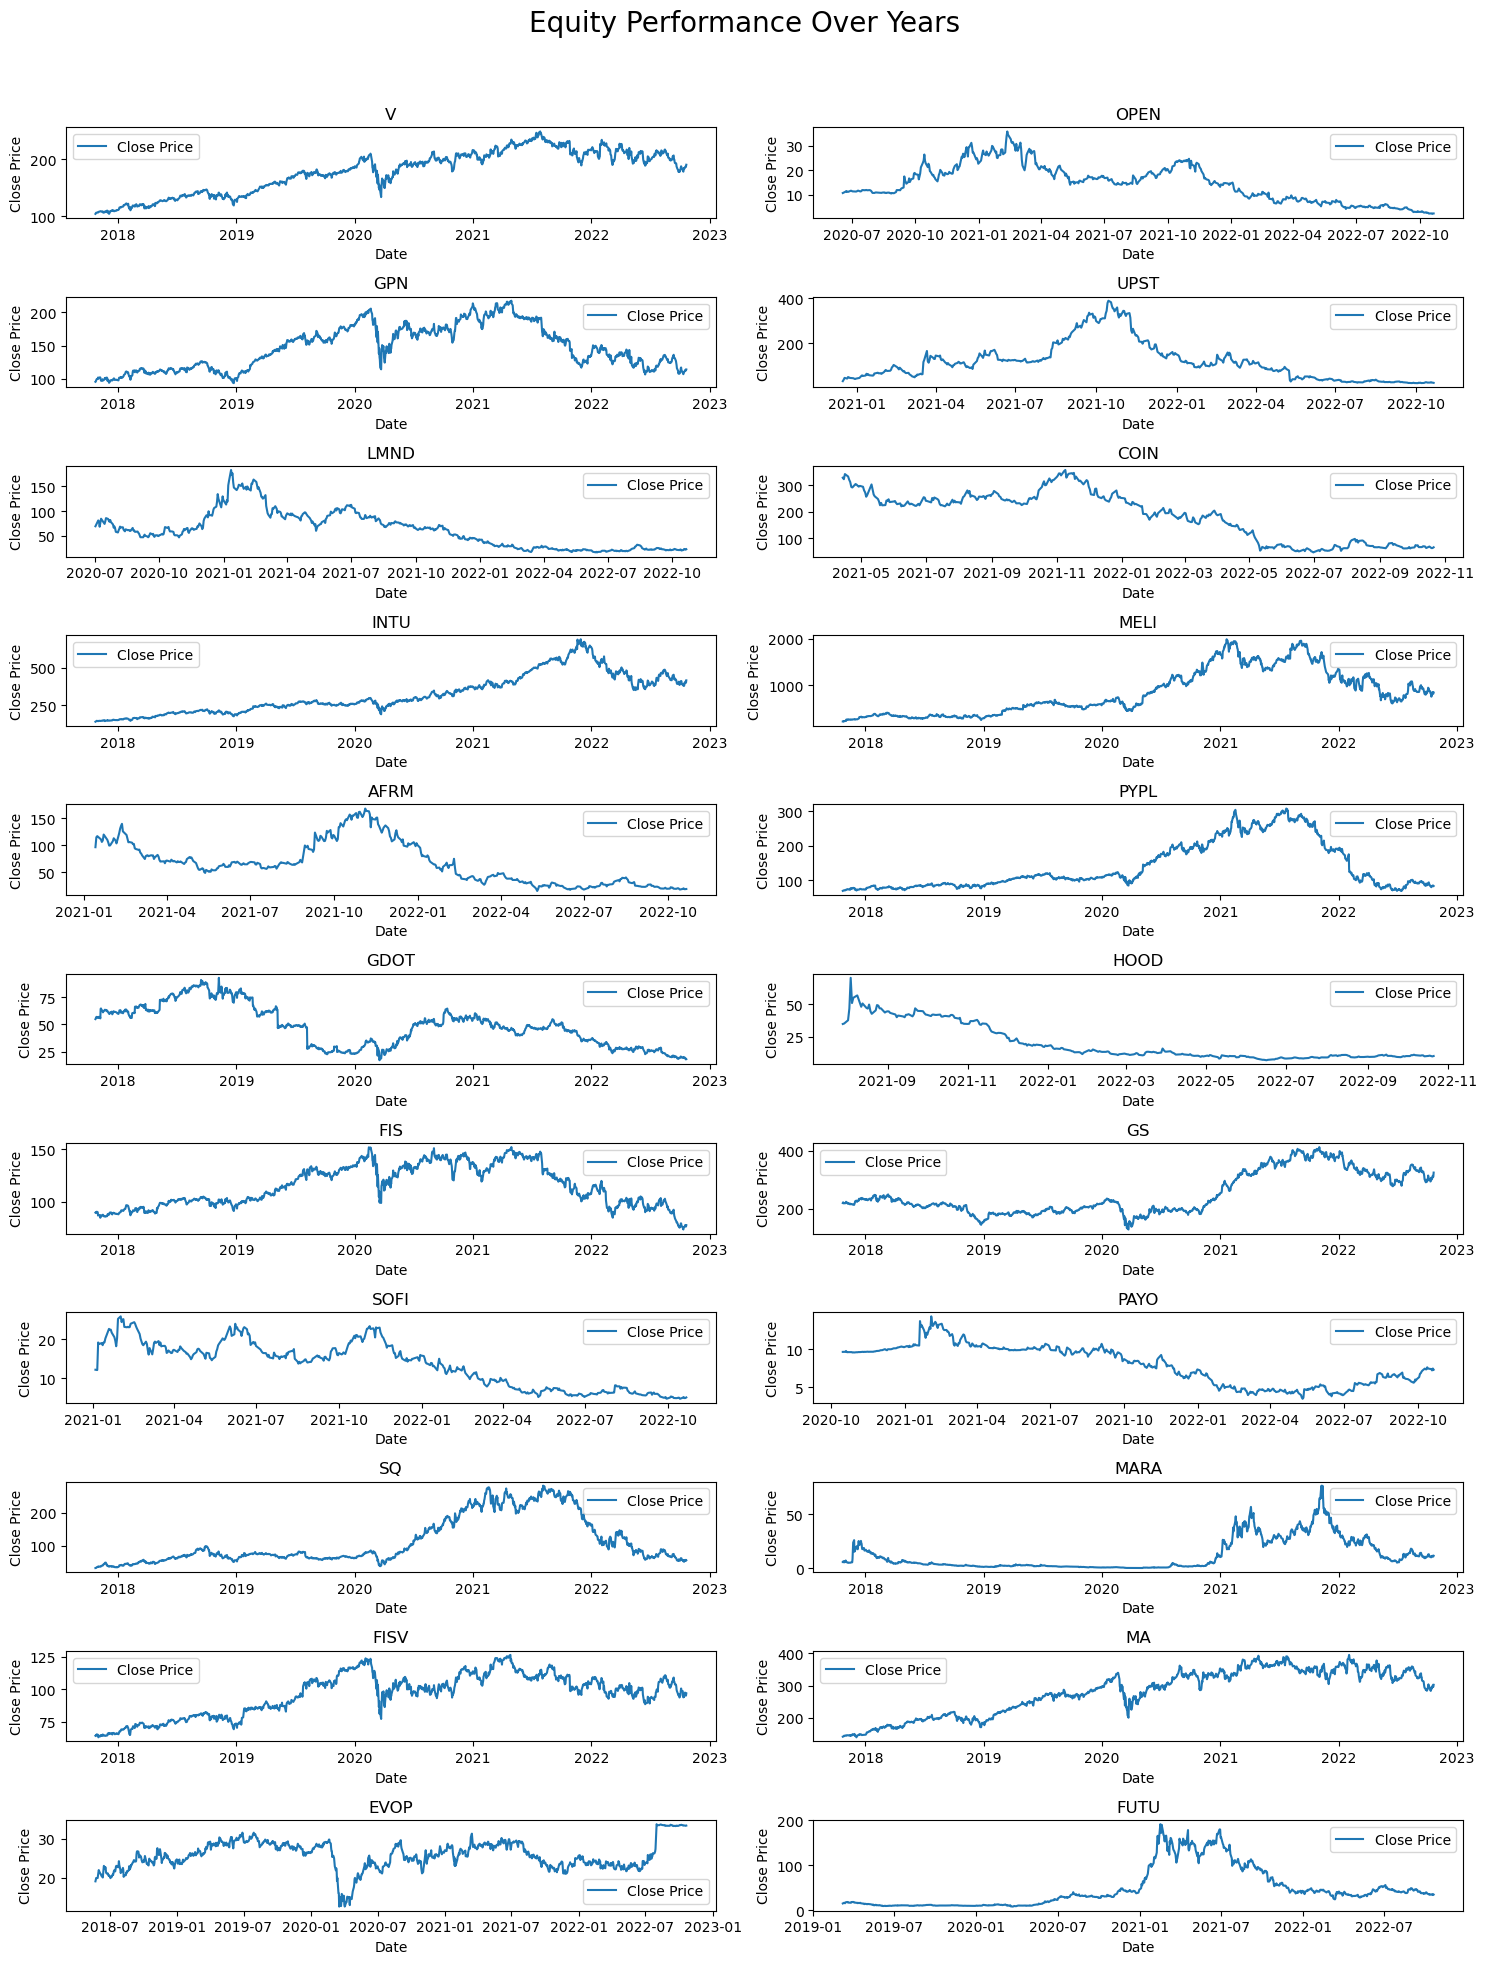

In [89]:
# Creating individual Dataframes
equity_dfs = [pd.read_csv(os.path.join(equity_folder, file), parse_dates=['Date']) for file in equity_files if file.endswith('.csv')]
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(15, 20))
fig.suptitle('Equity Performance Over Years', fontsize=20)

# Plot each dataframe on a separate subplot
for idx, ax in enumerate(axes.flat):
    equity_df = equity_dfs[idx]
    
    # Customize the plot as needed
    ax.plot(equity_df['Date'], equity_df['Close'], label='Close Price')
    ax.set_title(equity_files[idx].replace('.csv', '').replace('_', ' ').title().upper()) 
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

* **Overall Performance:**
  - GPN and UPST have outperformed other stocks and ETFs in the chart over the past five years.
  - GPN's price has increased steadily, while UPST's price has shown more volatility but generally trended upwards.
  - LMND and COIN have also performed well, although their prices have been more volatile than GPN and UPST.

* **Sector Performance:**
  - The chart includes stocks from various sectors, including financial technology (AFRM, PYPL), insurance (LMND), e-commerce (MELI), and cloud computing (INTU).
  - It is challenging to make generalizations about sector performance based on this limited data, but notable that the best-performing stocks, GPN and UPST, are from the financial technology sector.

* **Volatility:**
  - Some stocks in the chart, like LMND and COIN, have been more volatile, indicating significant price fluctuations.
  - Risk-averse investors may consider avoiding these stocks or including them in a diversified portfolio.

* **ETFs vs. Stocks:**
  - The chart includes two ETFs, SPY and VTI, tracking the S&P 500 and the total US stock market.
  - ETFs have generally performed in line with the average stock, suggesting they can be a good way to gain exposure to the stock market without picking individual stocks.

#### ETFs Plots

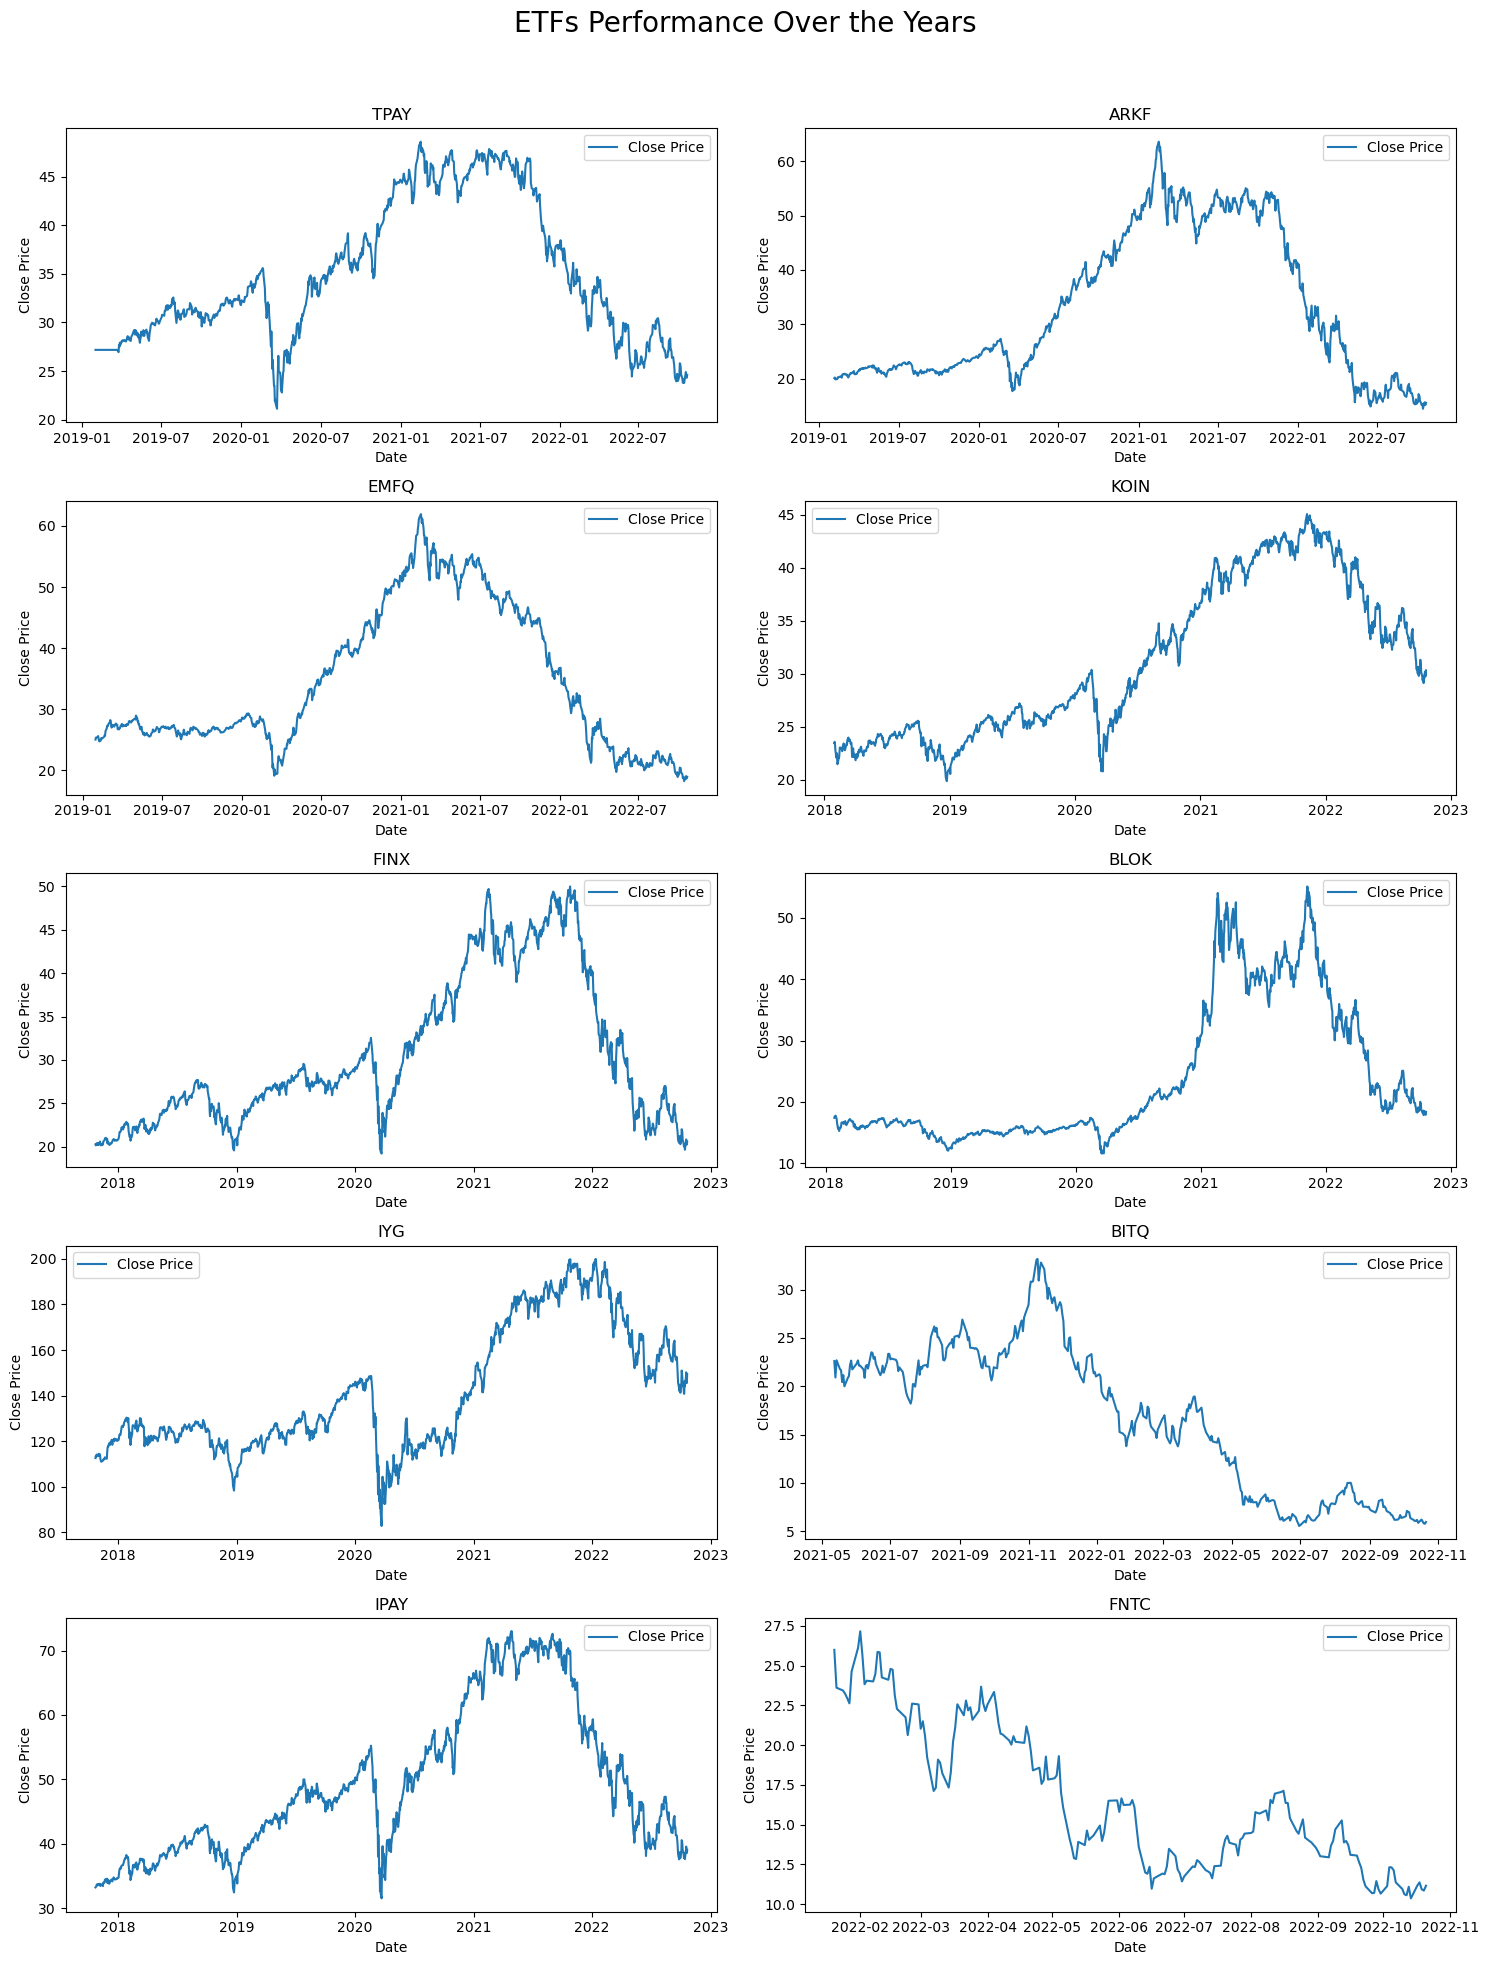

In [131]:
etf_dfs = [pd.read_csv(os.path.join(etf_folder, file), parse_dates=['Date']) for file in etf_files if file.endswith('.csv')]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('ETFs Performance Over the Years', fontsize=20)

# Plot each dataframe on a separate subplot
for idx, ax in enumerate(axes.flat):
    etf_df = etf_dfs[idx]
    
    # Customize the plot as needed
    ax.plot(etf_df['Date'], etf_df['Close'], label='Close Price')
    ax.set_title(etf_files[idx].replace('.csv', '').replace('_', ' ').title().upper())  
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.legend()

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

* **Overall Performance:**
  - All of the ETFs in the chart have experienced significant price fluctuations over the past few years.
  - TPAY and ARKE appear to have been the most volatile, with their prices rising and falling sharply over time.
  - EMFO and KOIN have been relatively stable, with their prices gradually increasing over the years.
  - FINX and BLOK have also been relatively stable, although their prices have declined slightly in recent months.
  - IYG and BITO have been more volatile, with their prices fluctuating significantly over the past year.
  - IPAY and FNTC have also been volatile, with IPAY's price declining sharply in recent months.

* **Trends:**
  - It is difficult to identify any clear trends in the data without additional context.
  - TPAY and ARKE, both focused on innovation and disruption, have been the most volatile, suggesting susceptibility to changes in investor sentiment.
  - EMFO and KOIN, focused on more traditional sectors like financials and energy, have been more stable, making them potentially suitable for investors seeking less volatility.

* **Specific Timeframes:**
  - The chart appears to be split into multiple timeframes, but details about these timeframes are unclear.
  - More information about the specific timeframes would be needed to provide more detailed insights.

### 3. Generate comparative visualizations, such as line charts or plots, to illustrate the relative performance of ETFs against individual stocks. What insights can be drawn from these visualizations?
(6 Marks)

In [145]:
# Load equity data
equity_folder = 'EQUITY/'
equity_dfs = []
equity_files = [file for file in os.listdir(equity_folder) if file.endswith('.csv')]

for file in equity_files:
    df = pd.read_csv(os.path.join(equity_folder, file), parse_dates=['Date'])
    df['Ticker'] = file.replace('.csv', '')
    equity_dfs.append(df)

# Load ETF data
etf_folder = 'ETFs/'
etf_dfs = []
etf_files = [file for file in os.listdir(etf_folder) if file.endswith('.csv')]

for file in etf_files:
    df = pd.read_csv(os.path.join(etf_folder, file), parse_dates=['Date'])
    df['Ticker'] = file.replace('.csv', '')
    etf_dfs.append(df)

In [152]:
def plot_securities(securities, title):
    plt.figure(figsize=(20, 8))
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')

    for security in securities:
        plt.plot(security['Date'], security['Close'], label=security['Ticker'].iloc[0])

    plt.legend()
    plt.show()

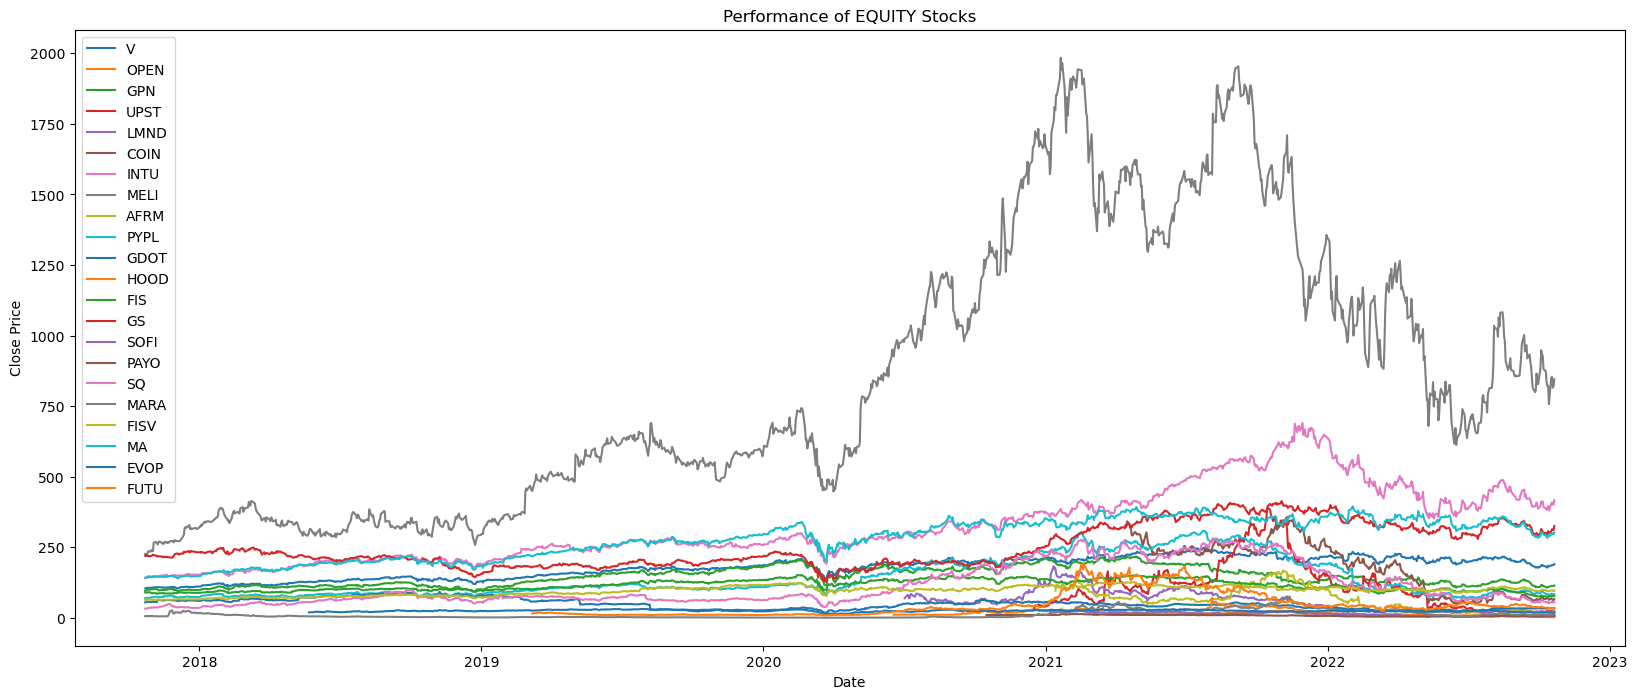

In [153]:
plot_securities(equity_dfs, 'Performance of EQUITY Stocks')

* **Overall Trend:**
  - The majority of the lines show an upward slope, indicating a general trend of price growth for the displayed stocks.
  - However, there are also some downward slopes and fluctuations, suggesting individual variations in performance.

* **Volatility:**
  - Some lines exhibit more volatility than others, displaying larger swings in price compared to relatively stable lines.
  - This suggests differences in risk profiles among the represented stocks.

* **Clusters:**
  - Certain groups of lines seem to move together to some extent, potentially indicating shared influences or sector trends.


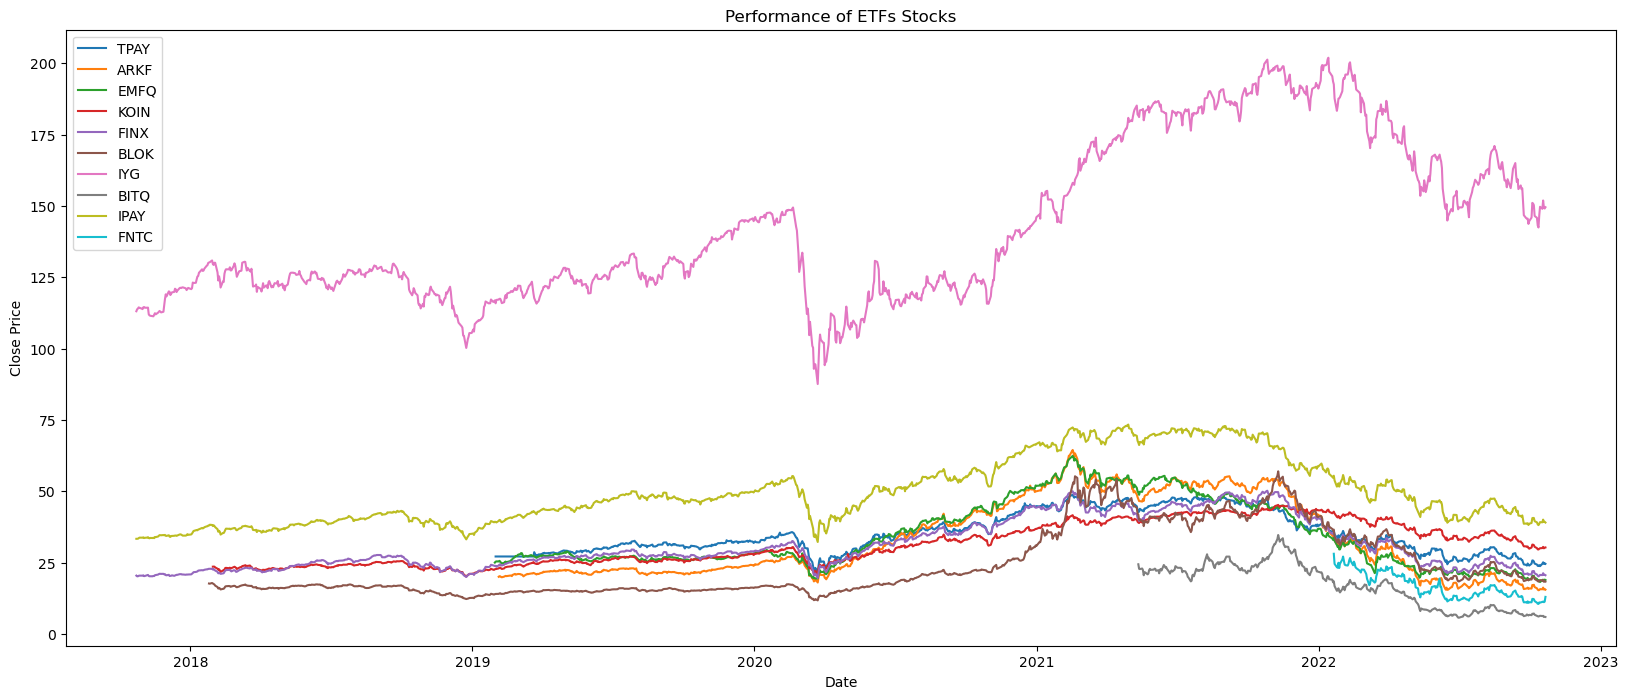

In [149]:
plot_securities(etf_dfs, 'Performance of ETFs Stocks')

* **Overall Trend and Volatility :**
  -  Trend and Volatility are same as above

  - Potential Clusters: There might be some subtle clustering of lines, particularly between "EMFQ," "KOIN," "FINX," and "BLOK," and between "BITQ" and "IPAY." This could suggest shared influences or sector trends, but further analysis with specific dates and security details would be needed to confirm.

* **Specific Observations:**
  - TPAY: TPAY seems to be the most consistently upward-trending stock, potentially indicating strong performance compared to the others.
  - ARKF: ARKF shows a more volatile pattern with significant upward and downward movements, suggesting higher risk but also potential for larger returns.
  - IYG: IYG appears to be relatively stable with a moderate upward trend, potentially indicating lower risk and consistent growth.

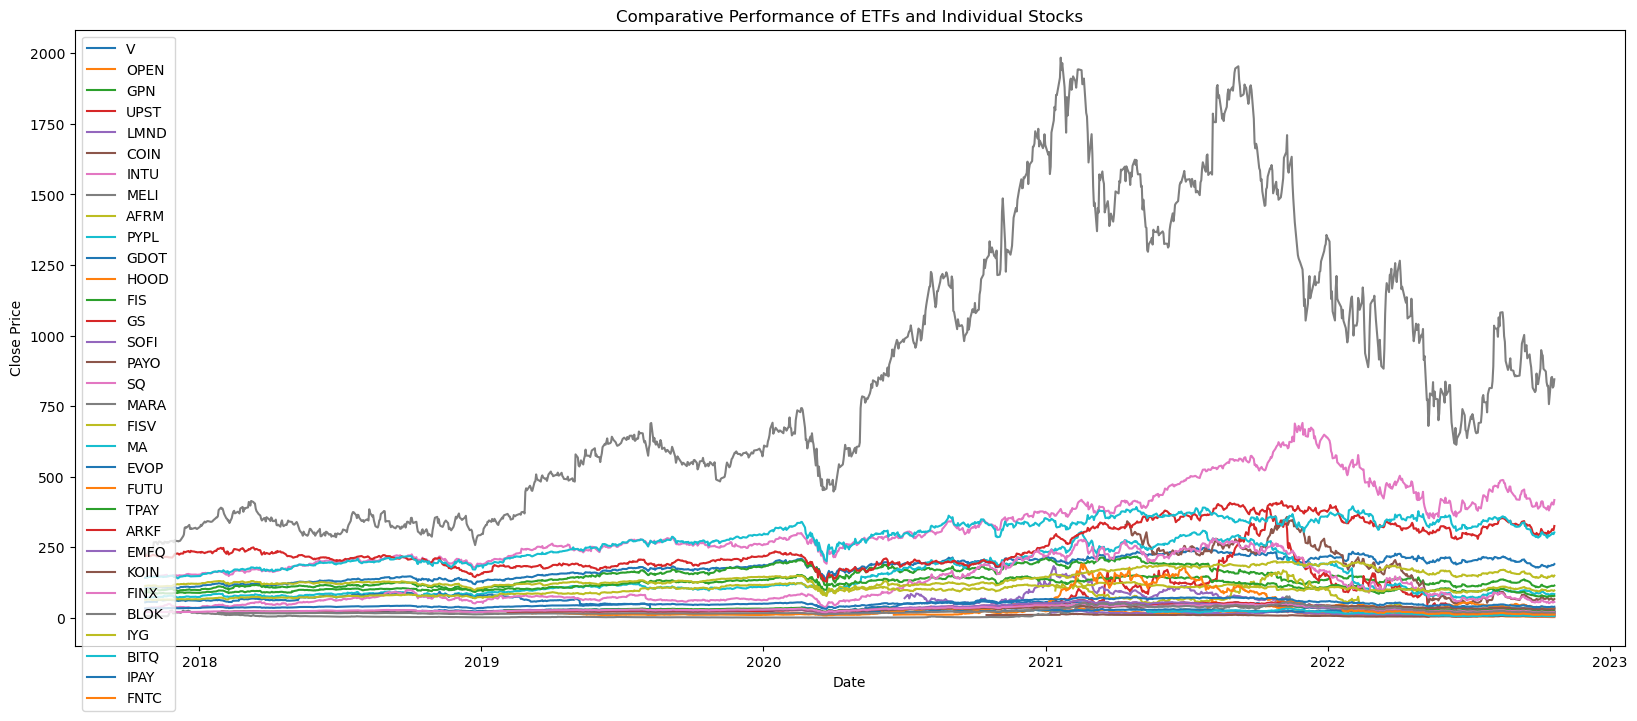

In [154]:
# Plot comparative performance
plot_securities(equity_dfs + etf_dfs, 'Comparative Performance of ETFs and Individual Stocks')

* **Potential :**
  - Strong: V, OPEN, GPN, and UPST show consistent upward trends, suggesting strong potential for continued growth.
  - Moderete : LMND, COIN, INTU, and MELI exhibit upward trends but with some fluctuations, indicating moderate growth potential with some risk.
  - UpComing - AFRM, PYPL, GDOT, and HOOD show mixed trends, possibly indicating emerging potential but also higher risk.
  
* **Other Insigths :**
   - Fintech: V, OPEN, PYPL, and FIS could be grouped together within the fintech sector, showing diverse performance within the category.
   - Growth Stocks: UPST, LMND, and AFRM might fall under the growth stock category, offering high potential but also significant risk.
   - Technology: GPN, HOOD, and SQ could be considered technology-related stocks with varying trends and risk profiles.

### 4.Perform a thorough check for duplicate records or entries within the historical data CSV files. How will you handle or remove any identified duplicates?
(2 Marks)

In [78]:
#function for removing duplications
def remove_duplicates_and_save(file_path):
    # Read DataFrame
    df = pd.read_csv(file_path)
    # Check for duplicates
    duplicates = df.duplicated()
    # Remove duplicates (keeping the first occurrence)
    df_cleaned = df.drop_duplicates(keep='first')
    # Save cleaned DataFrame to a new CSV file
    df_cleaned.to_csv(file_path, index=False)
    # Print information about removed duplicates
    removed_count = sum(duplicates)
    print(f'Removed {removed_count} duplicates from {file_path}')
    

In [79]:
# Remove duplicates from equity data
equity_files = [file for file in os.listdir(equity_folder) if file.endswith('.csv')]
for file in equity_files:
    file_path = os.path.join(equity_folder, file)
    remove_duplicates_and_save(file_path)

Removed 0 duplicates from EQUITY/V.csv
Removed 0 duplicates from EQUITY/OPEN.csv
Removed 0 duplicates from EQUITY/GPN.csv
Removed 0 duplicates from EQUITY/UPST.csv
Removed 0 duplicates from EQUITY/LMND.csv
Removed 0 duplicates from EQUITY/COIN.csv
Removed 0 duplicates from EQUITY/INTU.csv
Removed 0 duplicates from EQUITY/MELI.csv
Removed 0 duplicates from EQUITY/AFRM.csv
Removed 0 duplicates from EQUITY/PYPL.csv
Removed 0 duplicates from EQUITY/GDOT.csv
Removed 0 duplicates from EQUITY/HOOD.csv
Removed 0 duplicates from EQUITY/FIS.csv
Removed 0 duplicates from EQUITY/GS.csv
Removed 0 duplicates from EQUITY/SOFI.csv
Removed 0 duplicates from EQUITY/PAYO.csv
Removed 0 duplicates from EQUITY/SQ.csv
Removed 0 duplicates from EQUITY/MARA.csv
Removed 0 duplicates from EQUITY/FISV.csv
Removed 0 duplicates from EQUITY/MA.csv
Removed 0 duplicates from EQUITY/EVOP.csv
Removed 0 duplicates from EQUITY/FUTU.csv


In [80]:
# Remove duplicates from ETF data
etf_files = [file for file in os.listdir(etf_folder) if file.endswith('.csv')]
for file in etf_files:
    file_path = os.path.join(etf_folder, file)
    remove_duplicates_and_save(file_path)

Removed 0 duplicates from ETFs/TPAY.csv
Removed 0 duplicates from ETFs/ARKF.csv
Removed 0 duplicates from ETFs/EMFQ.csv
Removed 0 duplicates from ETFs/KOIN.csv
Removed 0 duplicates from ETFs/FINX.csv
Removed 0 duplicates from ETFs/BLOK.csv
Removed 0 duplicates from ETFs/IYG.csv
Removed 0 duplicates from ETFs/BITQ.csv
Removed 0 duplicates from ETFs/IPAY.csv
Removed 0 duplicates from ETFs/FNTC.csv


### 5. Are there any inconsistencies or irregularities in the data that require correction? Outline a strategy for data cleaning to enhance the dataset's integrity
(5 Marks)

In [91]:
# Drop rows with missing values in the 'Close' column for both equity and ETF datasets
equity_dfs_cleaned = [df.dropna(subset=['Close']) for df in equity_dfs]
equity_dfs_cleaned

etf_dfs_cleaned = [df.dropna(subset=['Close']) for df in etf_dfs]
etf_dfs_cleaned

[                          Date       Open       High        Low      Close  \
 0    2019-01-31 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 1    2019-02-01 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 2    2019-02-04 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 3    2019-02-05 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 4    2019-02-06 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 ..                         ...        ...        ...        ...        ...   
 935  2022-10-17 00:00:00-04:00  24.635000  24.635000  24.635000  24.635000   
 936  2022-10-18 00:00:00-04:00  25.129999  25.129999  24.719999  24.895000   
 937  2022-10-19 00:00:00-04:00  24.590000  24.590000  24.364799  24.364799   
 938  2022-10-20 00:00:00-04:00  24.799999  24.799999  24.303600  24.303600   
 939  2022-10-21 00:00:00-04:00  23.740000  24.608900  23.740000  24.608900   
 
      Volume  Dividends  Stock Splits  
 0        

#### Removing Duplicate:

In [92]:
# Remove duplicate rows based on all columns for both equity and ETF datasets
equity_dfs_cleaned = [df.drop_duplicates() for df in equity_dfs_cleaned]
equity_dfs_cleaned

etf_dfs_cleaned = [df.drop_duplicates() for df in etf_dfs_cleaned]
etf_dfs_cleaned


[                          Date       Open       High        Low      Close  \
 0    2019-01-31 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 1    2019-02-01 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 2    2019-02-04 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 3    2019-02-05 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 4    2019-02-06 00:00:00-05:00  27.173500  27.173500  27.173500  27.173500   
 ..                         ...        ...        ...        ...        ...   
 935  2022-10-17 00:00:00-04:00  24.635000  24.635000  24.635000  24.635000   
 936  2022-10-18 00:00:00-04:00  25.129999  25.129999  24.719999  24.895000   
 937  2022-10-19 00:00:00-04:00  24.590000  24.590000  24.364799  24.364799   
 938  2022-10-20 00:00:00-04:00  24.799999  24.799999  24.303600  24.303600   
 939  2022-10-21 00:00:00-04:00  23.740000  24.608900  23.740000  24.608900   
 
      Volume  Dividends  Stock Splits  
 0        

#### Checking Data Types

In [94]:
# Ensure 'Date' column is in datetime format for both equity and ETF datasets
equity_dfs_cleaned = [df.astype({'Date': 'datetime64[ns, UTC]'}) for df in equity_dfs_cleaned]

equity_dfs_cleaned

etf_dfs_cleaned = [df.astype({'Date': 'datetime64[ns, UTC]'}) for df in etf_dfs_cleaned]
etf_dfs_cleaned

[                         Date       Open       High        Low      Close  \
 0   2019-01-31 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 1   2019-02-01 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 2   2019-02-04 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 3   2019-02-05 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 4   2019-02-06 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 ..                        ...        ...        ...        ...        ...   
 935 2022-10-17 04:00:00+00:00  24.635000  24.635000  24.635000  24.635000   
 936 2022-10-18 04:00:00+00:00  25.129999  25.129999  24.719999  24.895000   
 937 2022-10-19 04:00:00+00:00  24.590000  24.590000  24.364799  24.364799   
 938 2022-10-20 04:00:00+00:00  24.799999  24.799999  24.303600  24.303600   
 939 2022-10-21 04:00:00+00:00  23.740000  24.608900  23.740000  24.608900   
 
      Volume  Dividends  Stock Splits  
 0         0          

#### Handling Outliers

In [100]:
# Remove outliers in the 'Close' column using z-score for both equity and ETF datasets
from scipy.stats import zscore

equity_dfs_cleaned = [df[(np.abs(zscore(df['Close'])) < 3)] for df in equity_dfs_cleaned]
equity_dfs_cleaned

etf_dfs_cleaned = [df[(np.abs(zscore(df['Close'])) < 3)] for df in etf_dfs_cleaned]
etf_dfs_cleaned


[                         Date       Open       High        Low      Close  \
 0   2019-01-31 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 1   2019-02-01 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 2   2019-02-04 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 3   2019-02-05 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 4   2019-02-06 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 ..                        ...        ...        ...        ...        ...   
 935 2022-10-17 04:00:00+00:00  24.635000  24.635000  24.635000  24.635000   
 936 2022-10-18 04:00:00+00:00  25.129999  25.129999  24.719999  24.895000   
 937 2022-10-19 04:00:00+00:00  24.590000  24.590000  24.364799  24.364799   
 938 2022-10-20 04:00:00+00:00  24.799999  24.799999  24.303600  24.303600   
 939 2022-10-21 04:00:00+00:00  23.740000  24.608900  23.740000  24.608900   
 
      Volume  Dividends  Stock Splits  
 0         0          

### 6.Explore correlations between different ETFs and individual stocks. How closely are their performances correlated, and does this indicate potential diversification opportunities?
(2 Marks)

Potential diversification opportunities:
- TPAY and GDOT
- TPAY and EVOP
- ARKF and EVOP
- EMFQ and UPST
- EMFQ and INTU
- EMFQ and GS
- EMFQ and EVOP
- KOIN and OPEN
- KOIN and GPN
- KOIN and LMND
- KOIN and GDOT
- KOIN and FIS
- KOIN and PAYO
- KOIN and EVOP
- FINX and GDOT
- FINX and EVOP
- BLOK and GPN
- BLOK and GDOT
- BLOK and FIS
- BLOK and EVOP
- IYG and OPEN
- IYG and GPN
- IYG and LMND
- IYG and GDOT
- IYG and FIS
- IYG and SOFI
- IYG and PAYO
- IYG and EVOP
- BITQ and MA
- BITQ and EVOP
- IPAY and GDOT
- IPAY and EVOP
- FNTC and PAYO
- FNTC and FISV
- FNTC and EVOP
- FNTC and FUTU


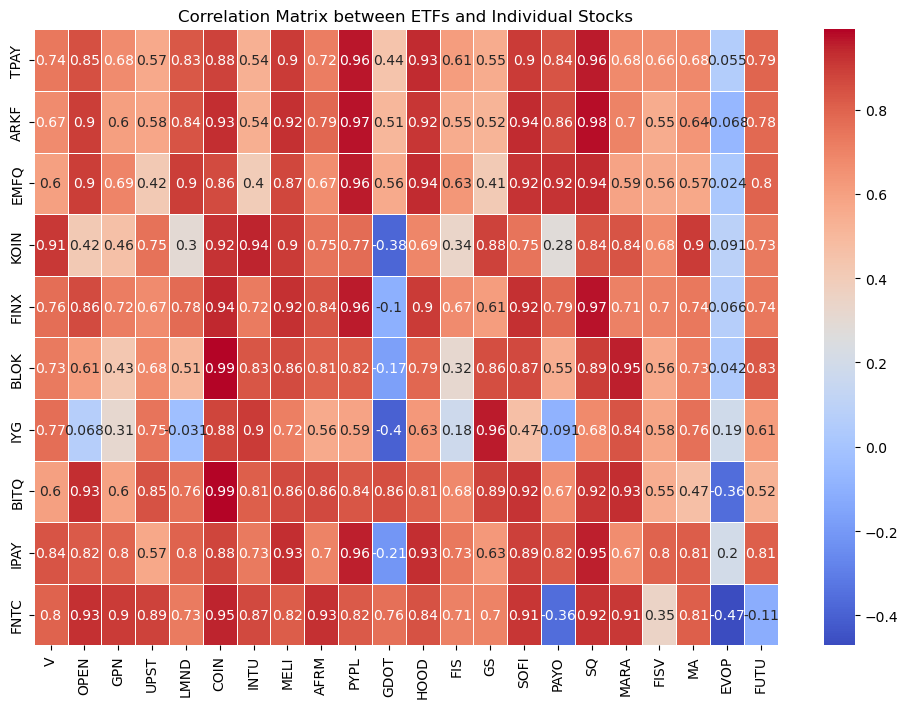

In [159]:
# Calculate correlations
correlation_matrix = pd.DataFrame(index=etf_data.keys(), columns=equity_data.keys())

for etf in etf_data:
    for equity in equity_data:
        correlation_matrix.loc[etf, equity] = etf_data[etf]['Close'].corr(equity_data[equity]['Close'])

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix between ETFs and Individual Stocks')

# Identify low correlations for diversification
low_correlations = np.where(correlation_matrix < 0.5)
print("Potential diversification opportunities:")
for i, j in zip(*low_correlations):
    print(f"- {correlation_matrix.index[i]} and {correlation_matrix.columns[j]}")

plt.show()

### 7.Identify and assess the extent of missing values in the dataset. What approach will you adopt to handle missing values, considering the impact on statistical analyses and visualizations?
(6 Marks)

#### Identify Missing Values

In [162]:
# 1. Identify missing values
# Function to identify missing values in a DataFrame
def identify_missing_values(df):
    missing_values_count = df.isnull().sum()
    print(f"Missing values in DataFrame:\n{missing_values_count}")

# Apply the function to each DataFrame
for df in equity_dfs:
    identify_missing_values(df)

for df in etf_dfs:
    identify_missing_values(df)

Missing values in DataFrame:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64
Missing values in DataFrame:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64
Missing values in DataFrame:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64
Missing values in DataFrame:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64
Missing values in DataFrame:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker     

In [163]:
# Check for missing values in each DataFrame
equity_missing = pd.concat([df.isnull().sum() for df in equity_dfs], axis=1, keys=[f'Equity_{i}' for i, _ in enumerate(equity_dfs_cleaned)])
etf_missing = pd.concat([df.isnull().sum() for df in etf_dfs], axis=1, keys=[f'ETF_{i}' for i, _ in enumerate(etf_dfs_cleaned)])

# Display missing values for equities
print("Missing Values in Equities:")
print(equity_missing)

# Display missing values for ETFs
print("\nMissing Values in ETFs:")
print(etf_missing)

Missing Values in Equities:
              Equity_0  Equity_1  Equity_2  Equity_3  Equity_4  Equity_5  \
Date                 0         0         0         0         0         0   
Open                 0         0         0         0         0         0   
High                 0         0         0         0         0         0   
Low                  0         0         0         0         0         0   
Close                0         0         0         0         0         0   
Volume               0         0         0         0         0         0   
Dividends            0         0         0         0         0         0   
Stock Splits         0         0         0         0         0         0   
Ticker               0         0         0         0         0         0   

              Equity_6  Equity_7  Equity_8  Equity_9  ...  Equity_12  \
Date                 0         0         0         0  ...          0   
Open                 0         0         0         0  ...          

#### Assess the Extent of Missing Values

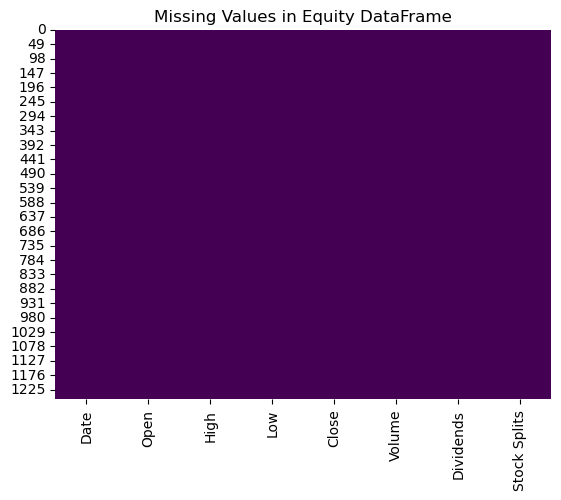

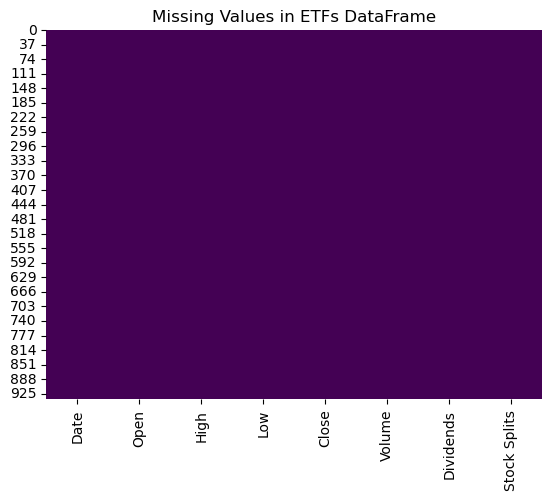

In [182]:
# Assess the Extent of Missing Values
import seaborn as sns
sns.heatmap(equity_dfs_cleaned[0].isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in Equity DataFrame')
plt.show()
sns.heatmap(etf_dfs_cleaned[0].isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in ETFs DataFrame')
plt.show()

### 8.Evaluate the potential reasons for missing values and propose strategies to impute or interpolate the missing data points
(5 Marks)

#### Impute Missing Values

In [165]:
# Impute missing values with the mean
equity_dfs_cleaned_imputed = [df.fillna(df.mean()) for df in equity_dfs_cleaned]
equity_dfs_cleaned_imputed
etf_dfs_cleaned_imputed = [df.fillna(df.mean()) for df in etf_dfs_cleaned]
etf_dfs_cleaned_imputed

[                         Date       Open       High        Low      Close  \
 0   2019-01-31 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 1   2019-02-01 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 2   2019-02-04 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 3   2019-02-05 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 4   2019-02-06 05:00:00+00:00  27.173500  27.173500  27.173500  27.173500   
 ..                        ...        ...        ...        ...        ...   
 935 2022-10-17 04:00:00+00:00  24.635000  24.635000  24.635000  24.635000   
 936 2022-10-18 04:00:00+00:00  25.129999  25.129999  24.719999  24.895000   
 937 2022-10-19 04:00:00+00:00  24.590000  24.590000  24.364799  24.364799   
 938 2022-10-20 04:00:00+00:00  24.799999  24.799999  24.303600  24.303600   
 939 2022-10-21 04:00:00+00:00  23.740000  24.608900  23.740000  24.608900   
 
      Volume  Dividends  Stock Splits  
 0         0          

### 9.Utilize statistical methods or visualization techniques to detect outliers in the historical data. How will you define and treat outliers, considering their potential influence on analyses and predictions?
(5 marks)

In [181]:
# Define columns of interest for handling outliers (adjust as needed)
equity_columns_of_interest = ['Volume']
etf_columns_of_interest = ['Volume']

# Function to detect and treat outliers using the IQR method
def handle_outliers(dataframe, columns, threshold=1.5):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Identify and treat outliers
        outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
        dataframe.loc[outliers, column] = dataframe[column].median()  # Replace with median (you can choose a different strategy)


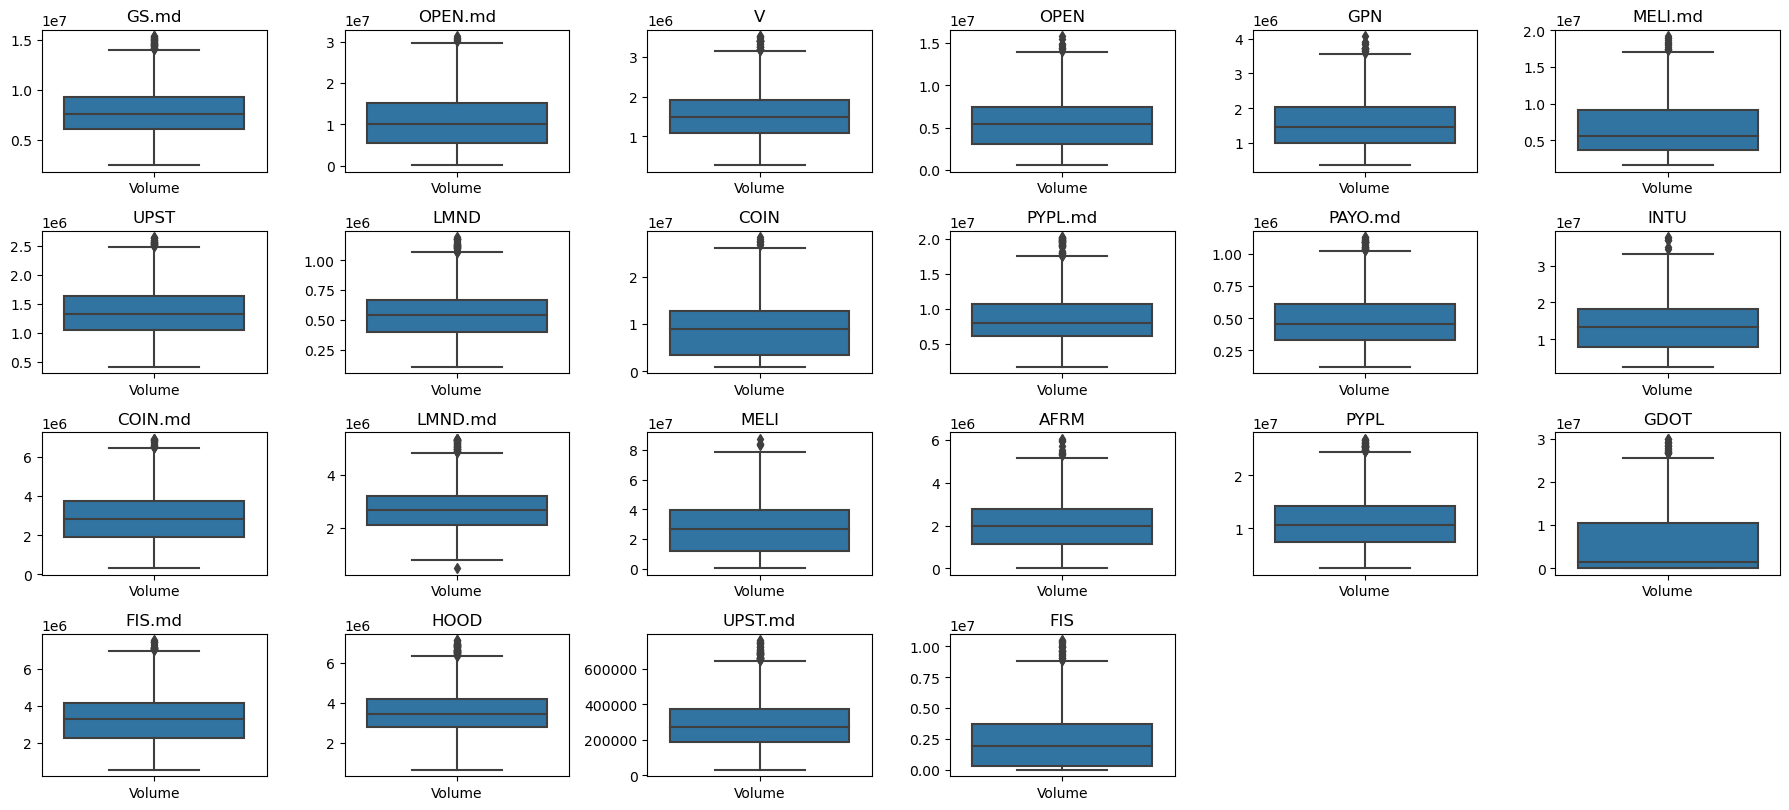

In [173]:
# Process Equity data
plt.figure(figsize=(18, 12))

for idx, equity_df in enumerate(equity_dfs_cleaned_imputed):
    plt.subplot(6, 6, idx + 1)

    sns.boxplot(data=equity_df[equity_columns_of_interest])
    plt.title(equity_files[idx].replace('.csv', ''))

    handle_outliers(equity_df, equity_columns_of_interest)


plt.tight_layout()
plt.show()


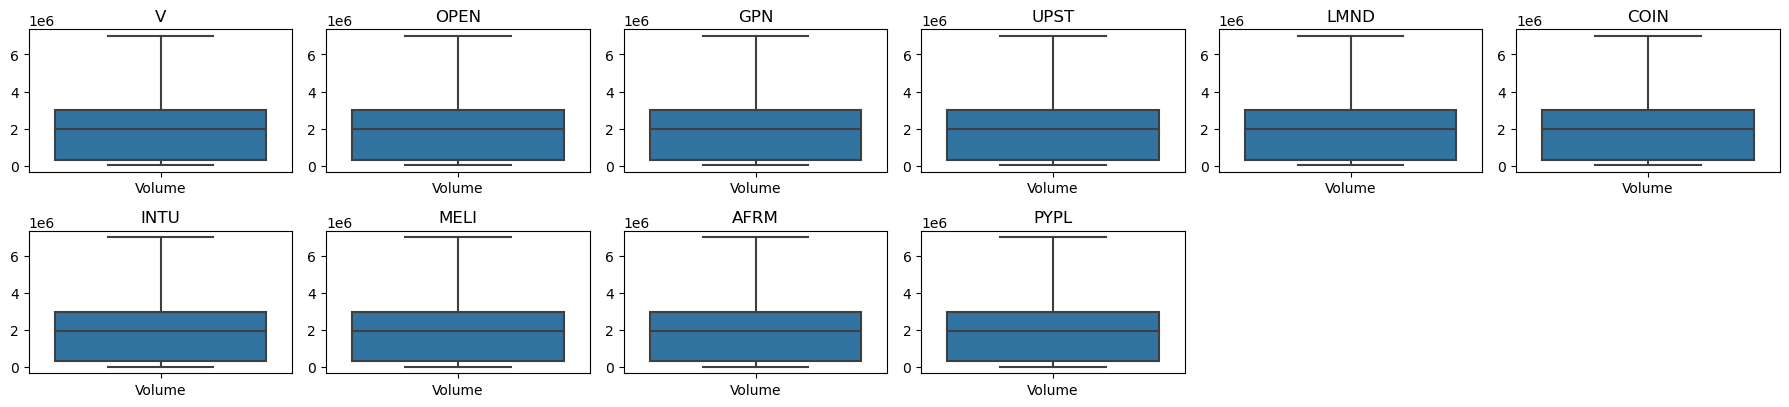

In [129]:
# Process ETFs data
plt.figure(figsize=(18, 12))

for idx, etf_df in enumerate(etf_dfs_cleaned_imputed):
    plt.subplot(6, 6, idx + 1)

    sns.boxplot(data=equity_df[etf_columns_of_interest])
    plt.title(equity_files[idx].replace('.csv', ''))

    handle_outliers(equity_df, equity_columns_of_interest)

plt.tight_layout()
plt.show()

### 10.Are there any opportunities for feature engineering within the dataset, such as creating new variables or transforming existing ones to better capture relevant information?
(6 Marks)

### Equity

In [190]:
for equity_df in equity_dfs_cleaned_imputed:
    # Convert 'Date' to datetime format
    equity_df['Date'] = pd.to_datetime(equity_df['Date'])

    # Sort DataFrame by 'Date' for time-based calculations
    equity_df = equity_df.sort_values(by='Date')

    # 1. Daily Returns
    equity_df['Daily_Returns'] = equity_df['Close'].pct_change()
    # 2. Weekly Returns
    equity_df['Weekly_Returns'] = equity_df['Close'].pct_change(periods=5)

    # 3. Moving Averages
    equity_df['7_Day_MA'] = equity_df['Close'].rolling(window=7).mean()
    equity_df['30_Day_MA'] = equity_df['Close'].rolling(window=30).mean()

    # 4. Volatility Measures
    equity_df['Volatility'] = equity_df['Daily_Returns'].rolling(window=30).std()

    # 5. Relative Strength Index (RSI)
    window = 14
    delta = equity_df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    equity_df['RSI'] = 100 - (100 / (1 + rs))

    # 6. Exponential Moving Averages (EMA)
    equity_df['EMA_12'] = equity_df['Close'].ewm(span=12, adjust=False).mean()
    equity_df['EMA_26'] = equity_df['Close'].ewm(span=26, adjust=False).mean()

    # 7. Time-Based Features (optional, if relevant for your analysis)
    equity_df['Weekday'] = equity_df['Date'].dt.weekday

    # 8. Dividend and Split Adjustments
    #equity_df['Adjusted_Close'] = equity_df['Close'].div(equity_df['Stock Splits'].cumprod()) * equity_df['Dividends'].cumsum()  


    print(equity_df.head())

                       Date        Open        High         Low       Close  \
0 2017-10-23 04:00:00+00:00  104.608330  104.782597  103.688585  104.104889   
1 2017-10-24 04:00:00+00:00  104.133917  105.179518  103.766024  104.956848   
2 2017-10-25 04:00:00+00:00  105.924995  107.086769  104.559904  106.002441   
3 2017-10-26 04:00:00+00:00  106.864102  107.212635  106.176718  106.302582   
4 2017-10-27 04:00:00+00:00  106.563949  106.622036  105.227909  106.215416   

     Volume  Dividends  Stock Splits  Daily_Returns  Weekly_Returns  7_Day_MA  \
0   6316700        0.0             0            NaN             NaN       NaN   
1  10511200        0.0             0       0.008184             NaN       NaN   
2  13261300        0.0             0       0.009962             NaN       NaN   
3   7380100        0.0             0       0.002831             NaN       NaN   
4   7862700        0.0             0      -0.000820             NaN       NaN   

   30_Day_MA  Volatility  RSI      EMA

### ETF

In [188]:
# Convert 'Date' to datetime format
equity_df['Date'] = pd.to_datetime(equity_df['Date'])

# Sort DataFrame by 'Date' for time-based calculations
equity_df = equity_df.sort_values(by='Date')

# 1. Daily Returns
equity_df['Daily_Returns'] = equity_df['Close'].pct_change()
# 2. Weekly Returns
equity_df['Weekly_Returns'] = equity_df['Close'].pct_change(periods=5)

# 3. Moving Averages
equity_df['7_Day_MA'] = equity_df['Close'].rolling(window=7).mean()
equity_df['30_Day_MA'] = equity_df['Close'].rolling(window=30).mean()

# 4. Volatility Measures
equity_df['Volatility'] = equity_df['Daily_Returns'].rolling(window=30).std()

# 5. Relative Strength Index (RSI)
window = 14
delta = equity_df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=window).mean()
avg_loss = loss.rolling(window=window).mean()

rs = avg_gain / avg_loss
equity_df['RSI'] = 100 - (100 / (1 + rs))

# 6. Exponential Moving Averages (EMA)
equity_df['EMA_12'] = equity_df['Close'].ewm(span=12, adjust=False).mean()
equity_df['EMA_26'] = equity_df['Close'].ewm(span=26, adjust=False).mean()

# 7. Time-Based Features (optional, if relevant for your analysis)
equity_df['Weekday'] = equity_df['Date'].dt.weekday

# 8. Dividend and Split Adjustments
equity_df['Adjusted_Close'] = equity_df['Close'].div(equity_df['Stock Splits'].cumprod()) * equity_df['Dividends'].cumsum()  


print(equity_df.head())

                       Date   Open       High        Low      Close   Volume  \
0 2019-03-08 05:00:00+00:00  14.76  17.500000  14.680000  15.320000  7250500   
1 2019-03-11 04:00:00+00:00  16.50  17.700001  16.190001  16.799999  2888500   
2 2019-03-12 04:00:00+00:00  17.00  17.520000  16.100000  16.400000  1667300   
3 2019-03-13 04:00:00+00:00  16.16  16.850000  15.770000  15.770000   942800   
4 2019-03-14 04:00:00+00:00  15.81  17.549999  15.800000  17.500000  1486900   

   Dividends  Stock Splits  Daily_Returns  7_Day_MA  30_Day_MA  Volatility  \
0          0             0            NaN       NaN        NaN         NaN   
1          0             0       0.096606       NaN        NaN         NaN   
2          0             0      -0.023810       NaN        NaN         NaN   
3          0             0      -0.038415       NaN        NaN         NaN   
4          0             0       0.109702       NaN        NaN         NaN   

   RSI     EMA_12     EMA_26  Weekday  Adjusted_Cl

### 11.Given the diverse nature of financial metrics, is normalization or scaling necessary for the features? How might normalization impact subsequent analyses or modeling efforts?
(2 Marks)

### 12.Explore different scaling techniques (e.g., Min-Max scaling, Z-score normalization) and assess their effects on data distribution.
(6 Marks)

### 13.Check for any categorical variables in the dataset, such as sector classifications or ETF types. How will you encode or handle these categorical variables for analysis ?
(5 Marks)

### 14.Examine the balance of the dataset in terms of the number of data points for each ETF and individual stock. How might data imbalances impact the robustness of analyses?
(5 Marks)

### 15.Considering the daily data, will you perform any aggregation (e.g., weekly, monthly) to identify longer-term trends or patterns? How might aggregation impact the analysis results?
(5 Marks)